# Wine Quality Classification

This is my Jupyter Notebook where I am trying to classify different types of wine in order to predict quality.

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

# Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
import datetime as dt

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import (train_test_split, 
                                     cross_val_score,
                                    GridSearchCV)

from sklearn.metrics import (accuracy_score, 
                            f1_score, 
                            confusion_matrix, 
                            classification_report,
                            confusion_matrix)

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import SGDClassifier

import xgboost as xgb

# Data

In [2]:
# Transfer the csv file into a pandas dataframe
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# EDA

In [3]:
# Do some initial research
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Get a look at the statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# No missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Check for duplicates
duplicates = df[df.duplicated()]
print(len(duplicates))

240


In [7]:
# Drop all duplicates
df.drop_duplicates(keep='first',inplace=True)

In [8]:
# How many are left?
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa229ebc750>,
      dtype=object)

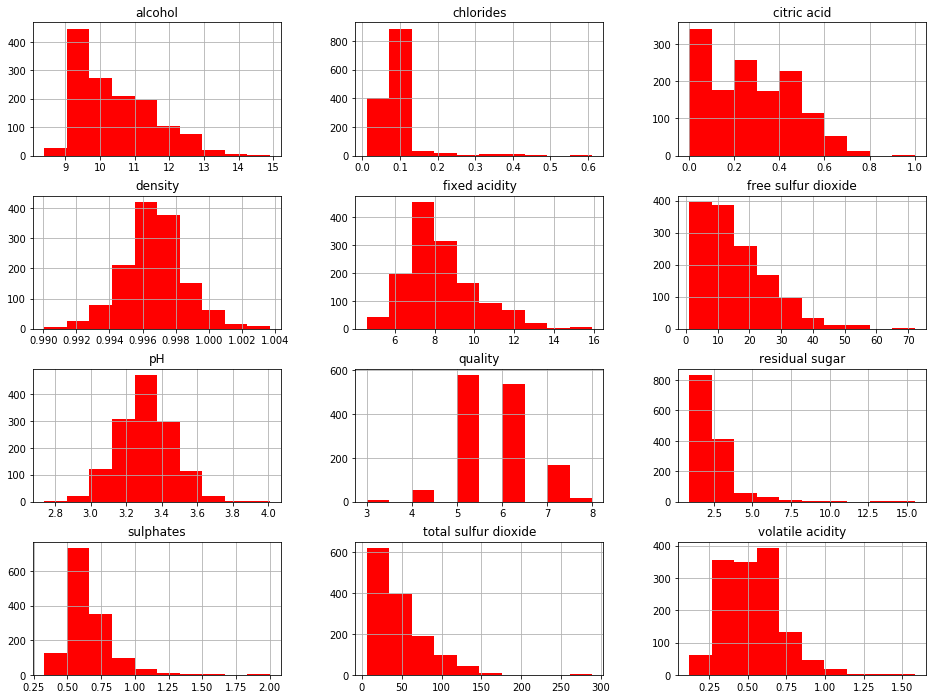

In [9]:
# Looks like all of the data is continuous - with the exception of the target
df.hist(figsize=(16,12), color = "Red")

In [10]:
# Number of wines in each target category
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

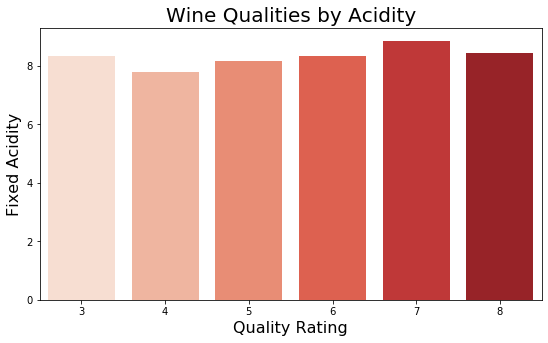

In [11]:
# Look at how acidity relates to quality
fig = plt.figure(figsize = (9,5))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df, palette='Reds', ci = None)
plt.xlabel("Quality Rating", fontsize = 16)
plt.ylabel("Fixed Acidity", fontsize = 16)
plt.title("Wine Qualities by Acidity", fontsize = 20)
plt.show()

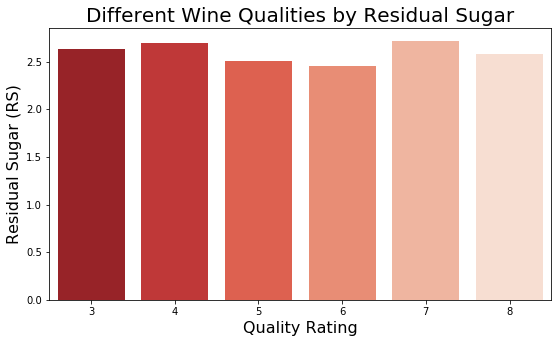

In [12]:
# Does sugar affect the quality?
fig = plt.figure(figsize = (9,5))
sns.barplot(x = 'quality', y = 'residual sugar', data = df, palette='Reds_r', ci = None)
plt.xlabel("Quality Rating", fontsize = 16)
plt.ylabel("Residual Sugar (RS)", fontsize = 16)
plt.title("Different Wine Qualities by Residual Sugar", fontsize = 20)
plt.show()

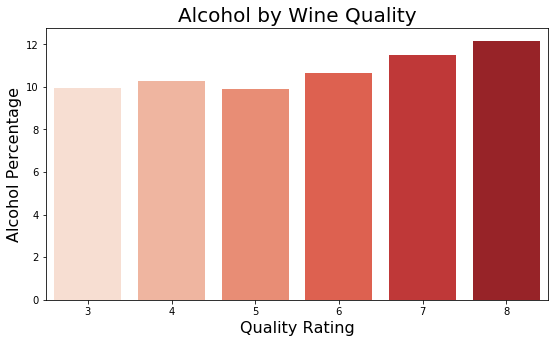

In [13]:
# Get a visual of how important alcohol content is?
fig = plt.figure(figsize = (9,5))
sns.barplot(x = 'quality', y = 'alcohol', data = df, palette='Reds', ci = None)
plt.xlabel("Quality Rating", fontsize = 16)
plt.ylabel("Alcohol Percentage", fontsize = 16)
plt.title("Alcohol by Wine Quality", fontsize = 20)
plt.show()

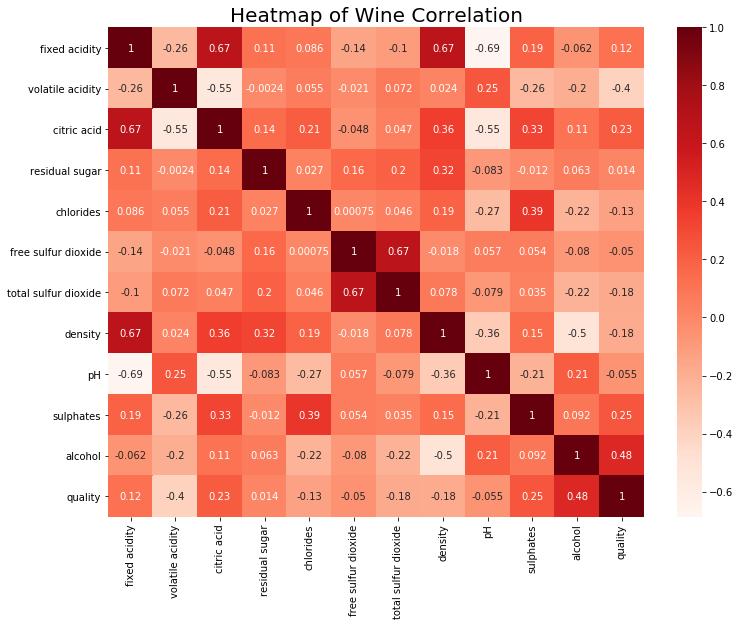

In [14]:
# Wine Heatmap Correlation
fig = plt.figure(figsize = (12,9))
sns.heatmap(df.corr(), annot=True, cmap="Reds")
plt.title('Heatmap of Wine Correlation', fontsize = 20)
plt.show()

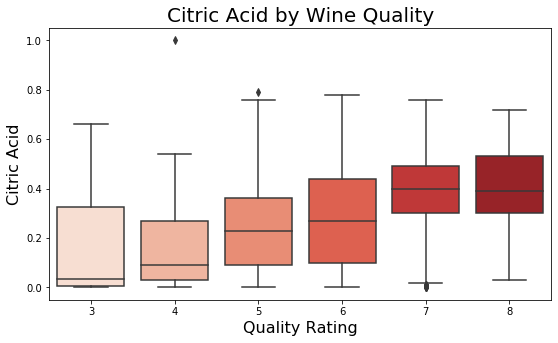

In [15]:
# Boxplot of Citric Acid
fig = plt.figure(figsize = (9,5))
sns.boxplot(x = 'quality', y = 'citric acid', data = df, palette='Reds')
plt.xlabel("Quality Rating", fontsize = 16)
plt.ylabel("Citric Acid", fontsize = 16)
plt.title("Citric Acid by Wine Quality", fontsize = 20)
plt.show()

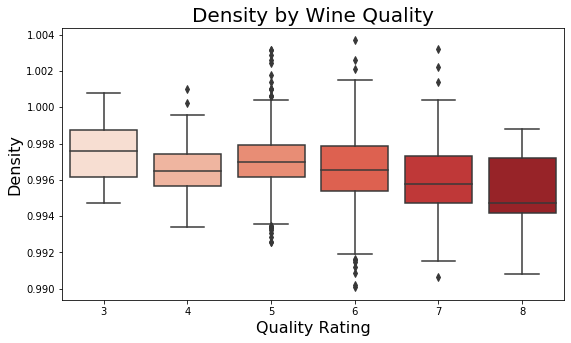

In [16]:
# Boxplot of wine Density
fig = plt.figure(figsize = (9,5))
sns.boxplot(x = 'quality', y = 'density', data = df, palette='Reds')
plt.xlabel("Quality Rating", fontsize = 16)
plt.ylabel("Density", fontsize = 16)
plt.title("Density by Wine Quality", fontsize = 20)
plt.show()

Using the Heatmap I discovered that 'Citric Acid' and 'Density' were correlated to the wine quality. The box plots above demonstrate this correlation.  I also discovered using these box plots that there are a number of outliers that could be looked at further.

## Transform the target variable: 

In [17]:
# Create bins for 'quality' based on the values given.
bins_target = [2, 6.5, 8]
labels = ['Bad', 'Good']
df['quality'] = pd.cut(df['quality'], bins = bins_target, labels = labels)
df.head()

# Another way to do it, with list comprehension.
# df['quality'] = ['Good' if x >= 7 else 'Bad' for x in df['quality']]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Bad


In [18]:
# How many in each target group?
df['quality'].value_counts()

Bad     1175
Good     184
Name: quality, dtype: int64

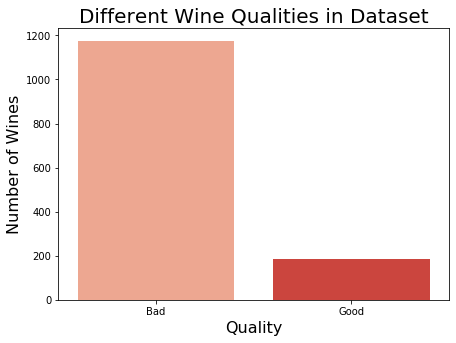

In [19]:
# The report mentions that the dataset is unbalanced!
fig = plt.figure(figsize = (7,5))
sns.countplot(x='quality', data=df, palette='Reds')
plt.xlabel("Quality", fontsize = 16)
plt.ylabel("Number of Wines", fontsize = 16)
plt.title("Different Wine Qualities in Dataset", fontsize = 20)
plt.show()

In [20]:
# Load Label Encoder
labels = LabelEncoder()
# Bad = 0 and Good = 1 
df['quality'] = labels.fit_transform(df['quality'])
df.head()

# Another way to do this:
# Replace target values - Bad = 0 and Good = 1
# df['quality'] = df['quality'].replace({'quality': {'Good' : 1, 'Bad' : 0}})

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


# Test/Train Split

In [21]:
# The target variable
y = df.quality

In [22]:
# Drop target and set the dependent values variables 
X = df.drop('quality', axis=1) 

In [23]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Scaling the Data

In [24]:
# Applying Standard scaling to get optimized result
stdscr = StandardScaler()
X_train = stdscr.fit_transform(X_train)
# Remember to keep the test data seperate!
X_test = stdscr.fit_transform(X_test)

# Models

## Logistic Regression Model

In [25]:
# Log model
log_clf = LogisticRegression(random_state=123)
log_model = log_clf.fit(X_train, y_train)

log_training_preds = log_clf.predict(X_train)
log_training_accuracy = accuracy_score(y_train, log_training_preds)

log_val_preds = log_clf.predict(X_test)
log_val_accuracy = accuracy_score(y_test, log_val_preds)

print("Log Training Accuracy: {:.4}%".format(log_training_accuracy * 100))
print("Log Validation Accuracy: {:.4}%".format(log_val_accuracy * 100))

Log Training Accuracy: 87.63%
Log Validation Accuracy: 87.94%


In [26]:
# Classification report, precision and recall
print(classification_report(y_test, log_val_preds))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       301
           1       0.47      0.36      0.41        39

    accuracy                           0.88       340
   macro avg       0.69      0.65      0.67       340
weighted avg       0.87      0.88      0.87       340



In [27]:
# Confusion matrix 
log_matrix = confusion_matrix(y_test, log_val_preds)
print('Confusion Matrix:\n', log_matrix)

Confusion Matrix:
 [[285  16]
 [ 25  14]]


In [28]:
# If the test accuracy was 100%
print("Perfect Confusion Matrix:")
print([349, 0])
print([0, 51])

Perfect Confusion Matrix:
[349, 0]
[0, 51]


## Random Forest Model

In [29]:
# Forest Model
forest_clf = RandomForestClassifier()
forest_model = forest_clf.fit(X_train, y_train)

forest_training_preds = forest_clf.predict(X_train)
forest_training_accuracy = accuracy_score(y_train, forest_training_preds)

forest_val_preds = forest_clf.predict(X_test) # y_hat
forest_val_accuracy = accuracy_score(y_test, forest_val_preds)

print("Forest Training Accuracy: {:.4}%".format(forest_training_accuracy * 100))
print("Forest Validation accuracy: {:.4}%".format(forest_val_accuracy * 100))

Forest Training Accuracy: 100.0%
Forest Validation accuracy: 90.0%


In [30]:
# Classification report
print(classification_report(y_test, forest_val_preds))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       301
           1       0.59      0.41      0.48        39

    accuracy                           0.90       340
   macro avg       0.76      0.69      0.71       340
weighted avg       0.89      0.90      0.89       340



In [31]:
# Confusion matrix 
forest_matrix = confusion_matrix(y_test, forest_val_preds)
print('Confusion Matrix:\n', forest_matrix)

Confusion Matrix:
 [[290  11]
 [ 23  16]]


## XGBoost

In [32]:
# XGB classifier
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

xgb_training_preds = xgb_clf.predict(X_train)
xgb_training_accuracy = accuracy_score(y_train, xgb_training_preds)

xgb_val_preds = xgb_clf.predict(X_test)
xgb_val_accuracy = accuracy_score(y_test, xgb_val_preds)

print("XGB Training Accuracy: {:.4}%".format(xgb_training_accuracy * 100))
print("XGB Validation accuracy: {:.4}%".format(xgb_val_accuracy * 100))

XGB Training Accuracy: 96.66%
XGB Validation accuracy: 89.71%


In [33]:
# XGB classification report
print(classification_report(y_test, xgb_val_preds))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       301
           1       0.56      0.51      0.53        39

    accuracy                           0.90       340
   macro avg       0.75      0.73      0.74       340
weighted avg       0.89      0.90      0.90       340



In [34]:
# Regular confusion matrix
xgb_matrix = confusion_matrix(y_test, xgb_val_preds)
print('Confusion Matrix:\n', xgb_matrix)

Confusion Matrix:
 [[285  16]
 [ 19  20]]


## KNN Model

In [35]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

knn_training_preds = knn_clf.predict(X_train)
knn_training_accuracy = accuracy_score(y_train, knn_training_preds)

knn_val_preds = knn_clf.predict(X_test)
knn_val_accuracy = accuracy_score(y_test, knn_val_preds)

print("KNN Training Accuracy: {:.4}%".format(knn_training_accuracy * 100))
print("KNN Validation accuracy: {:.4}%".format(knn_val_accuracy * 100))

KNN Training Accuracy: 89.5%
KNN Validation accuracy: 87.06%


In [36]:
# KNN classification report
print(classification_report(y_test, knn_val_preds))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       301
           1       0.44      0.44      0.44        39

    accuracy                           0.87       340
   macro avg       0.68      0.68      0.68       340
weighted avg       0.87      0.87      0.87       340



In [37]:
# Regular confusion matrix
knn_matrix = confusion_matrix(y_test, knn_val_preds)
print('Confusion Matrix:\n', knn_matrix)

Confusion Matrix:
 [[279  22]
 [ 22  17]]


## Support Vector Model - SVC

In [38]:
svc_clf = SVC()
svc_clf.fit(X_train, y_train)

svc_training_preds = svc_clf.predict(X_train)
svc_training_accuracy = accuracy_score(y_train, svc_training_preds)

svc_val_preds = svc_clf.predict(X_test)
svc_val_accuracy = accuracy_score(y_test, svc_val_preds)

print("SVC Training Accuracy: {:.4}%".format(svc_training_accuracy * 100))
print("SVC Validation accuracy: {:.4}%".format(svc_val_accuracy * 100))

SVC Training Accuracy: 89.11%
SVC Validation accuracy: 89.71%


In [39]:
# SVC classification report
print(classification_report(y_test, svc_val_preds))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       301
           1       0.58      0.36      0.44        39

    accuracy                           0.90       340
   macro avg       0.75      0.66      0.69       340
weighted avg       0.88      0.90      0.89       340



In [40]:
# Regular confusion matrix
svc_matrix = confusion_matrix(y_test, svc_val_preds)
print('Confusion Matrix:\n', svc_matrix)

Confusion Matrix:
 [[291  10]
 [ 25  14]]


## Stochastic Gradient Decent Model

In [41]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

sgd_training_preds = sgd_clf.predict(X_train)
sgd_training_accuracy = accuracy_score(y_train, svc_training_preds)

sgd_val_preds = sgd_clf.predict(X_test)
sgd_val_accuracy = accuracy_score(y_test, sgd_val_preds)

print("Stochastic GD Training Accuracy: {:.4}%".format(sgd_training_accuracy * 100))
print("Stochastic GD Validation accuracy: {:.4}%".format(sgd_val_accuracy * 100))

Stochastic GD Training Accuracy: 89.11%
Stochastic GD Validation accuracy: 83.53%


In [42]:
# Stochastic classification report
print(classification_report(y_test, sgd_val_preds))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       301
           1       0.38      0.72      0.50        39

    accuracy                           0.84       340
   macro avg       0.67      0.78      0.70       340
weighted avg       0.89      0.84      0.86       340



In [43]:
# Regular confusion matrix
sgd_matrix = confusion_matrix(y_test, sgd_val_preds)
print('Confusion Matrix:\n', sgd_matrix)

Confusion Matrix:
 [[256  45]
 [ 11  28]]


# Summary

All models had pretty similar accuracy scores, with the XGBoost validation accuracy coming out a bit on top at 89.71%. I only wish I had these statistics available (along with my model) to help me purchase my next bottle of wine!

Apparently, the higher the alcohol, the better the quality.


# Future Work

I could use Grid Search to modify the parameters and try improve the performance of my models. I also could use Cross Validation Score to assess the effectiveness of my model, particularly in order to avoid over-fitting.

I also discovered that there were a number of outliers that could be dealt with in future models.